In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


Import datasets

In [2]:
trainData = pd.read_csv('/kaggle/input/titanic/train.csv')
testData = pd.read_csv('/kaggle/input/titanic/test.csv')

Shape of training and testing dataset

In [3]:
print(trainData.shape)
print(testData.shape)

(891, 12)
(418, 11)


Numeric Summary of training data

In [4]:
trainData.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Catagorical Summary of training data

In [5]:
trainData.describe(include='object')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Sage, Master. Thomas Henry",male,1601,C23 C25 C27,S
freq,1,577,7,4,644


In [6]:
trainData.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Data Cleaning**

In [7]:
# Looking for missing values in each column
trainMissingValues = trainData.isnull().sum()
testMissingValues = trainData.isnull().sum()
print(trainMissingValues)
print(testMissingValues)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [8]:
# Removing "Cabin" as it mainly consists of NaN values 
trainData.drop('Cabin', axis=1, inplace=True)
testData.drop('Cabin', axis=1, inplace=True)

In [9]:
# Filling missing values with mean in "Age"
trainData.Age.fillna(trainData['Age'].mean(), inplace=True)
testData.Age.fillna(trainData['Age'].mean(), inplace=True)

In [10]:
# Filling missing values in "Embarked"
trainData.Embarked.fillna(value=(trainData.Embarked.value_counts().idxmax()), inplace=True)
testData.Embarked.fillna(value=(testData.Embarked.value_counts().idxmax()), inplace=True)

In [11]:
# View new missing values after data cleaning to compare
newTrainMissingValues = trainData.isnull().sum()
newTestMissingValues = trainData.isnull().sum()
print(newTrainMissingValues)
print(newTestMissingValues)

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


**Data Visualization - Relationships**

Correlation Matrix Heatmap

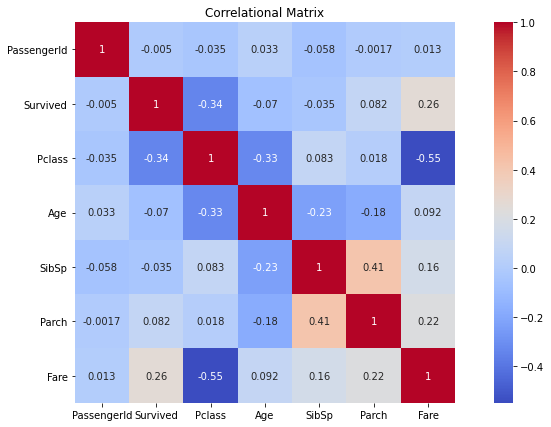

In [12]:
plt.figure(figsize=(14,7))
plt.title("Correlational Matrix")
ax = sns.heatmap(trainData.corr(), annot=True, square="True", cmap="coolwarm")

Bar plot to show relation between **"Pclass"** and **"Survived"** with **"Sex"**

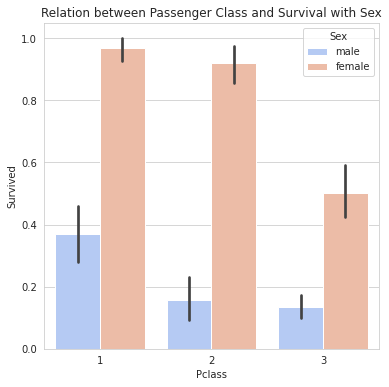

In [13]:
plt.figure(figsize=(6,6))
sns.set_style("whitegrid")
plt.title("Relation between Passenger Class and Survival with Sex")
ax = sns.barplot(x="Pclass", y="Survived", data=trainData, hue="Sex", palette="coolwarm")

Relation between **"Pclass"** and **"Fare"** with **"Embarked"**

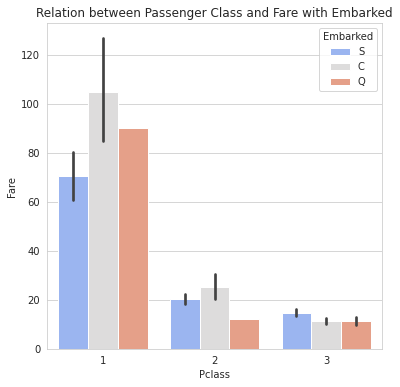

In [14]:
plt.figure(figsize=(6,6))
sns.set_style("whitegrid")
plt.title("Relation between Passenger Class and Fare with Embarked")
ax = sns.barplot(x="Pclass", y="Fare", data=trainData, hue="Embarked", palette="coolwarm")

Relation between **"Age"** and **"Fare"** with **"Survived"**

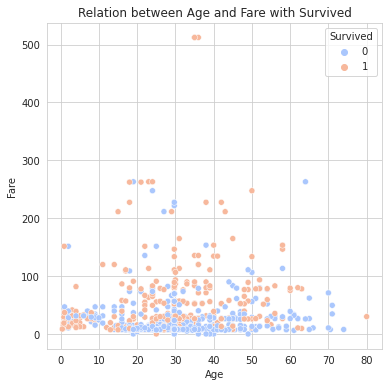

In [15]:
plt.figure(figsize=(6,6))
sns.set_style("whitegrid")
plt.title("Relation between Age and Fare with Survived")
ax = sns.scatterplot(x="Age", y="Fare", data=trainData, hue="Survived", palette="coolwarm")

Relationshsip between **"Survived"** and **"Age"** with **"Sex"**

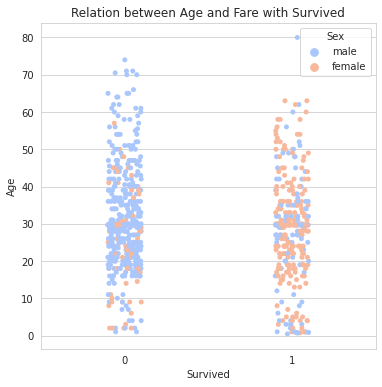

In [16]:
plt.figure(figsize=(6,6))
sns.set_style("whitegrid")
plt.title("Relation between Age and Fare with Survived")
ax = sns.stripplot(x="Survived", y="Age", data=trainData, hue="Sex", palette="coolwarm")

**Data Visualization - Distribution**

Distribution of **"Age"**

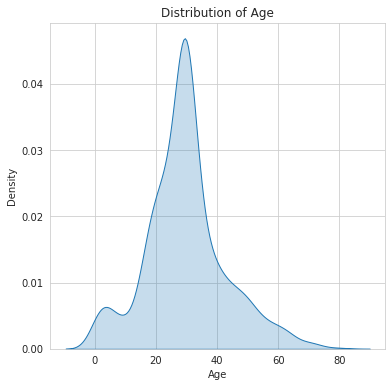

In [17]:
plt.figure(figsize=(6,6))
sns.set_style("whitegrid")
plt.title("Distribution of Age")
ax = sns.kdeplot(data=trainData["Age"], shade=True, palette="coolwarm")

**Data Visualization - Trends**

Trends in **"Fare"**

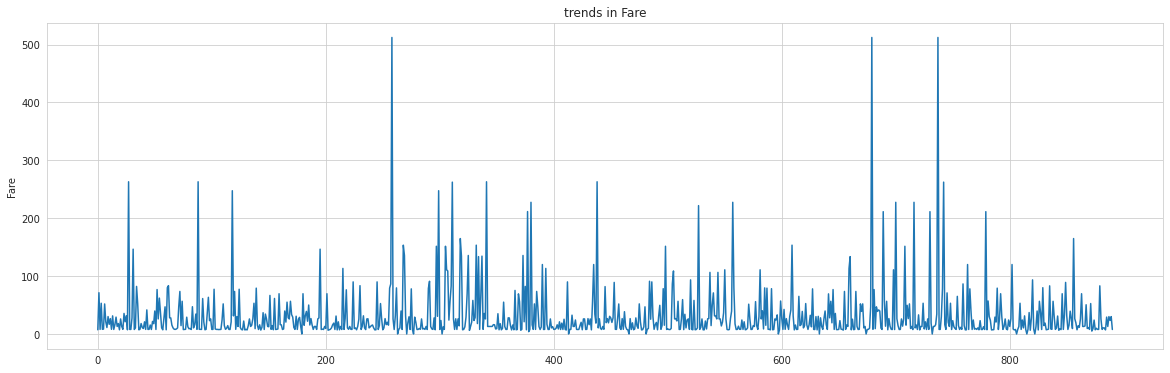

In [18]:
plt.figure(figsize=(20,6))
sns.set_style("whitegrid")
plt.title("trends in Fare")
ax1 = sns.lineplot(data=trainData["Fare"])

**ML Model - Explore pattern**

Rate of first class passengers who survived

In [19]:
firstClass = trainData.loc[trainData.Pclass == 1]["Survived"]
firstClassRate = sum(firstClass)/len(firstClass)

print("Rate of first class passengers who survived:", firstClassRate*100)

Rate of first class passengers who survived: 62.96296296296296


Rate of second class passengers who survived

In [20]:
secondClass = trainData.loc[trainData.Pclass == 2]["Survived"]
secondClassRate = sum(secondClass)/len(secondClass)

print("Rate of second class passengers who survived:", secondClassRate*100)

Rate of second class passengers who survived: 47.28260869565217


Rate of third class passengers who survived

In [21]:
thirdClass = trainData.loc[trainData.Pclass == 3]["Survived"]
thirdClassRate = sum(thirdClass)/len(thirdClass)

print("Rate of third class passengers who survived:", thirdClassRate*100)

Rate of third class passengers who survived: 24.236252545824847


Rate of women who survived

In [22]:
women = trainData.loc[trainData.Sex == 'female']["Survived"]
womenRate = sum(women)/len(women)

print("Rate of women who survived:", womenRate*100)

Rate of women who survived: 74.20382165605095


Rate of men who survived

In [23]:
men = trainData.loc[trainData.Sex == 'male']["Survived"]
menRate = sum(men)/len(men)

print("Rate of men who survived:", menRate*100)

Rate of men who survived: 18.890814558058924


**ML Model - Training**

Predicting survival of passengers based on the columns **"Pclass"**, **"Sex"**, **"Age"**, **"Parch"** using Random Forest Classifier

In [24]:
from sklearn.ensemble import RandomForestClassifier

y = trainData["Survived"]

features = ["Pclass", "Sex", "Age", "Parch"]
X = pd.get_dummies(trainData[features])
XTest = pd.get_dummies(testData[features])

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)
predictions = model.predict(XTest)
output = pd.DataFrame({'PassengerId': testData.PassengerId, 'Survived': predictions})
output.to_csv('my_submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
